In [62]:
# import des modules nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.formula.api as statsapi
import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import xlrd as xlrd
from matplotlib import font_manager # for mac users
import platform
import os
from sklearn.decomposition import PCA

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Pour lister les polices présentes
#fpaths = matplotlib.font_manager.findSystemFonts()
#for i in fpaths:
#    f = matplotlib.font_manager.get_font(i)
#    print(f.family_name)
# import de la police Garamond

system = platform.system()
print(system)
if system == 'Darwin':  # macOS
  font_path = '/Library/Fonts/GaramondPremrPro.otf'
elif system == 'Windows':
  font_path = 'C:/Windows/Fonts/Garamond.TTF'
else:  #  unix
  font_path = 'GARA.TTF'
print(font_path)

garamond_font = FontProperties(fname="/Library/Fonts/GaramondPremrPro.otf",size=14) # for MAC
garamond_font = FontProperties(fname="/Library/Fonts/Garamond.otf",size=14) # for WINDOWS

#    timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

font_manager.findSystemFonts(fontpaths=font_path, fontext="ttf")
font_manager.findfont("Garamond Premier Pro") 

# Définissez la police par défaut pour toute la figure
matplotlib.rcParams['font.family'] = 'Garamond'

Windows
C:/Windows/Fonts/Garamond.TTF


In [109]:
# Chargement des données CANCER DU SEIN
df_bc_data = pd.read_table("input/mlsupervise/wdbc.data",sep=",")
#df_bc_names = pd.read_table("input/mlsupervise/wdbc.names",sep=",")

# Ajout titre colonnes
#df_pingouin.columns=["species","island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]

# Verif données
print(df_bc_data.columns)
#print(df_bc_data.isna().count())
print(type(df_bc_data))
print(df_bc_data.shape)

# ==> Pas de valeurs manquantes

Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776', '0.3001', '0.1471',
       '0.2419', '0.07871', '1.095', '0.9053', '8.589', '153.4', '0.006399', '0.04904', '0.05373',
       '0.01587', '0.03003', '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
(568, 32)


Projet 2. Le cancer du sein

In [112]:
# Projet 2. Question 1

# import des librairies
from sklearn.model_selection import train_test_split
print(df_bc_data)
X=df_bc_data.drop(columns={"M"})
print("X: ",X)
y=df_bc_data.iloc[:,1:2]
print("y :", y)

# Split du jeu de données
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, shuffle=False, stratify=None)
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001   0.1471  0.2419  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..        ... ..    ...    ...     ...     ...      ...      ...      ...      ...     ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.2

In [116]:
# Remplacement des valeurs de y_train par 1 ou 0
y_train.replace({"M": 1, "B": 0},inplace=True)
print(y_train)

     M
0    1
1    1
2    1
3    1
4    1
..  ..
449  0
450  1
451  0
452  0
453  0

[454 rows x 1 columns]


In [118]:
import sklearn
from sklearn.tree import plot_tree
#from sklearn.tree import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=6)
dt = dt.fit(X_train,y_train)

KeyError: 23

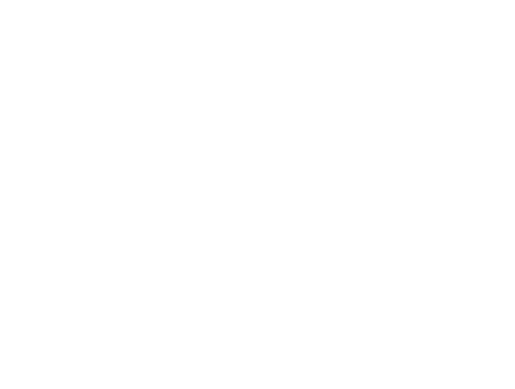

In [119]:
# Affichage de l'Arbre
fig = plt.figure()
plot_tree(dt,filled=True, feature_names=X_train,class_names=y_train)
plt.title("Arbre de profondeur 1 sur les données Pingouin")
plt.show()

In [88]:
# Définition des tableaux de données X et Y
#X = df_pingouin[["culmen_length_mm","culmen_depth_mm"]]
#Y = df_pingouin["species"] # Target names
#print(len(X))
#print(len(Y))
# Rename pour être plus parlant
#features_values=X.loc[1:,:].values
#features_names=X.columns.values
#target_names = Y.loc[1:].values
#print(len(features_values))
#print(target_names)
# Entrainement d'un arbre de profondeur 1
#clf = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=1)
#clf = clf.fit(features_values,target_names)

# Affichage de l'Arbre
#fig = plt.figure()
#plot_tree(clf,filled=True, feature_names=features_names,class_names=["Adelie","Chinstrap","Gentoo"])
#plt.title("Arbre de profondeur 1 sur les données Pingouin")
#plt.show()



(array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]]), range(0, 5))
